In [32]:
#!/usr/bin/env python3

import pandas as pd
import errno    
import os
import numpy as np
import math

pd.set_option('display.max_rows', 4000)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

'''
Author: Enrico Ceccolini
    TODO write the description
'''

datadir = "/datasets/eurora_data/db1/"
infile_jobs_to_nodes = datadir + "job_nodes.csv"

# settings
interval_comment = "Andrea"
suffix = "_1min_"
start_time = pd.to_datetime('2014-03-31')
end_time = pd.to_datetime('2014-05-01')

infile_large_jobs = datadir + "CPUs/" + interval_comment + "/large_jobs_real_pow_" + interval_comment + ".csv"

## notice that 43 doesn't exists in the db
nodes=['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64']
nodes=['01'] # test

In [33]:
jobs_to_nodes_whole_data = pd.read_csv(infile_jobs_to_nodes, index_col=0)
print("jobs_to_nodes_whole_data contains {} records".format(jobs_to_nodes_whole_data.shape[0]))

### clean the data
# remove jobs runned on the inexistent node 129
jobs_to_nodes_whole_data = jobs_to_nodes_whole_data[jobs_to_nodes_whole_data['node_id'] != 129] 
# remove jobs with the same id that runned on the same node
jobs_to_nodes_whole_data = jobs_to_nodes_whole_data.drop_duplicates(subset=['job_id_string', 'node_id'])
print("after the clean, jobs_to_nodes_whole_data contains {} records".format(jobs_to_nodes_whole_data.shape[0]))

interval_large_jobs = pd.read_csv(infile_large_jobs, index_col=0)
merged_jobs_to_nodes = pd.merge(jobs_to_nodes_whole_data, interval_large_jobs, on='job_id_string')
print(merged_jobs_to_nodes.shape[0])

jobs_to_nodes_whole_data contains 469095 records
after the clean, jobs_to_nodes_whole_data contains 444610 records
26913


In [34]:
# merged_jobs_to_nodes

In [35]:
node = "01"
print(node)

jobs_to_node = merged_jobs_to_nodes[merged_jobs_to_nodes['node_id'] == int(node)]
infile_node = datadir + "CPUs/" + interval_comment + "/node" + node + suffix + interval_comment + "_active_cores_and_jobs"
node_data = pd.read_csv(infile_node + ".csv")
print("{}".format(node_data.shape[0]))
print("{}".format(jobs_to_node.shape[0]))

01
44641
384


In [22]:
node_start_time = node_data.iloc[0]['timestamp']
num_minutes = node_data.shape[0]
power_consumption = pd.Series(0, index=np.arange(num_minutes))
print("{}".format(node_start_time))


2014-03-31 00:00:00


In [23]:
i = 0
num_jobs = jobs_to_node.shape[0]
for index, row in jobs_to_node.iterrows():
    print("{}/{}   {}".format(i, num_jobs, row['job_id_string']))
    i = i + 1
    print(i)
    start_time = pd.to_datetime(row['run_start_time'])
    end_time = pd.to_datetime(row['end_time'])
    job_cores = row['ncpus']
    #job_gpus = row['ngpus']
    #job_mics = row['nmics']
    job_power_consumption = row['real_pow']
    # print(job_power_consumption)
    
    before_minutes = int((start_time - pd.to_datetime(node_start_time)) / np.timedelta64(1, 'm'))
    running_minutes = int((end_time - start_time) / np.timedelta64(1, 'm'))
    after_minutes = num_minutes - running_minutes - before_minutes
    
    print("{} - {} - {}".format(before_minutes, running_minutes, after_minutes))
    before_serie = pd.Series(0, index=np.arange(before_minutes))
    running_serie = pd.Series(job_power_consumption, index=np.arange(running_minutes))
    after_serie = pd.Series(0, index=np.arange(after_minutes))
    concat_series = pd.concat([before_serie, running_serie, after_serie], ignore_index=True)
    
    power_consumption = power_consumption.add(concat_series, fill_value=0)


0/384   499903.node129
1
739 - 2 - 43900
44641 / 44641
1/384   499905.node129
2
743 - 1 - 43897
44641 / 44641
2/384   500234.node129
3
778 - 1 - 43862
44641 / 44641
3/384   500255.node129
4
820 - 17 - 43804
44641 / 44641
4/384   500269.node129
5
856 - 21 - 43764
44641 / 44641
5/384   500792.node129
6
1079 - 28 - 43534
44641 / 44641
6/384   502459.node129
7
2305 - 60 - 42276
44641 / 44641
7/384   502642.node129
8
3056 - 241 - 41344
44641 / 44641
8/384   502645.node129
9
2514 - 241 - 41886
44641 / 44641
9/384   502684.node129
10
2761 - 241 - 41639
44641 / 44641
10/384   503910.node129
11
3509 - 30 - 41102
44641 / 44641
11/384   504138.node129
12
3570 - 2 - 41069
44641 / 44641
12/384   504146.node129
13
3573 - 15 - 41053
44641 / 44641
13/384   504449.node129
14
3632 - 17 - 40992
44641 / 44641
14/384   504633.node129
15
3664 - 35 - 40942
44641 / 44641
15/384   504885.node129
16
3753 - 15 - 40873
44641 / 44641
16/384   504978.node129
17
3844 - 3 - 40794
44641 / 44641
17/384   505362.node129

44641 / 44641
197/384   589708.node129
198
22252 - 18 - 22371
44641 / 44641
198/384   589716.node129
199
22273 - 32 - 22336
44641 / 44641
199/384   589748.node129
200
22306 - 31 - 22304
44641 / 44641
200/384   589769.node129
201
22338 - 32 - 22271
44641 / 44641
201/384   589904.node129
202
22456 - 2 - 22183
44641 / 44641
202/384   589906.node129
203
22459 - 5 - 22177
44641 / 44641
203/384   589908.node129
204
22460 - 2 - 22179
44641 / 44641
204/384   589912.node129
205
22464 - 4 - 22173
44641 / 44641
205/384   589915.node129
206
22469 - 12 - 22160
44641 / 44641
206/384   589919.node129
207
22473 - 12 - 22156
44641 / 44641
207/384   589942.node129
208
22483 - 7 - 22151
44641 / 44641
208/384   589946.node129
209
22486 - 17 - 22138
44641 / 44641
209/384   589957.node129
210
22491 - 1 - 22149
44641 / 44641
210/384   590047.node129
211
22504 - 2 - 22135
44641 / 44641
211/384   590056.node129
212
22507 - 33 - 22101
44641 / 44641
212/384   590065.node129
213
22511 - 2 - 22128
44641 / 44641
21

347/384   602204.node129
348
35642 - 30 - 8969
44641 / 44641
348/384   602254.node129
349
35761 - 30 - 8850
44641 / 44641
349/384   603065.node129
350
36797 - 7 - 7837
44641 / 44641
350/384   603072.node129
351
36806 - 8 - 7827
44641 / 44641
351/384   603751.node129
352
38353 - 3 - 6285
44641 / 44641
352/384   606156.node129
353
40003 - 15 - 4623
44641 / 44641
353/384   608226.node129
354
40375 - 16 - 4250
44641 / 44641
354/384   608227.node129
355
40403 - 3 - 4235
44641 / 44641
355/384   616625.node129
356
40953 - 1 - 3687
44641 / 44641
356/384   616749.node129
357
40989 - 30 - 3622
44641 / 44641
357/384   617004.node129
358
41025 - 4 - 3612
44641 / 44641
358/384   617488.node129
359
41182 - 16 - 3443
44641 / 44641
359/384   617907.node129
360
41326 - 3 - 3312
44641 / 44641
360/384   617943.node129
361
41383 - 4 - 3254
44641 / 44641
361/384   619896.node129
362
41776 - 5 - 2860
44641 / 44641
362/384   622182.node129
363
42418 - 30 - 2193
44641 / 44641
363/384   622217.node129
364
4245

In [24]:
power_consumption

0          0.000000
1          0.000000
2          0.000000
3          0.000000
4          0.000000
5          0.000000
6          0.000000
7          0.000000
8          0.000000
9          0.000000
10         0.000000
11         0.000000
12         0.000000
13         0.000000
14         0.000000
15         0.000000
16         0.000000
17         0.000000
18         0.000000
19         0.000000
20         0.000000
21         0.000000
22         0.000000
23         0.000000
24         0.000000
25         0.000000
26         0.000000
27         0.000000
28         0.000000
29         0.000000
30         0.000000
31         0.000000
32         0.000000
33         0.000000
34         0.000000
35         0.000000
36         0.000000
37         0.000000
38         0.000000
39         0.000000
40         0.000000
41         0.000000
42         0.000000
43         0.000000
44         0.000000
45         0.000000
46         0.000000
47         0.000000
48         0.000000
49         0.000000


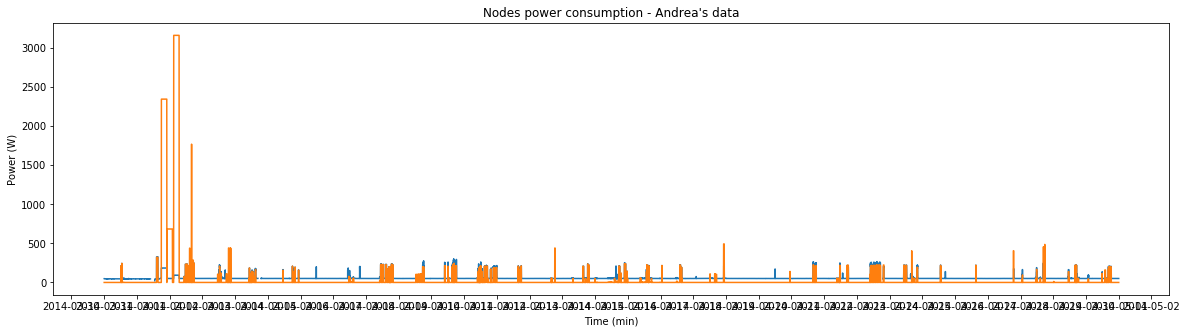

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime

node_data = node_data[pd.to_datetime(node_data['timestamp']) >= start_time]
node_data = node_data[pd.to_datetime(node_data['timestamp']) <= end_time]

plt.rcParams['figure.figsize'] = (20,5)

X_AXIS_NAME = 'Time (min)'
Y_AXIS_NAME = 'Power (W)'
TITLE = 'Nodes power consumption - Andrea\'s data'

fig, ax = plt.subplots()
ax.xaxis.get_majorticklabels()
ax.xaxis.set_major_locator(mdates.DayLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

dates = []

for ts in node_data['timestamp']:
    local_d = datetime.strptime(ts, '%Y-%m-%d %H:%M:%S')
    dates.append(local_d)

plt.plot(dates, node_data['pow_tot_0'] + node_data['pow_tot_1'])
#plt.scatter(dates, node_data['pow_tot_0'] + node_data['pow_tot_1'])

plt.plot(dates, power_consumption)

#fig.autofmt_xdate()
plt.xlabel(X_AXIS_NAME)
plt.ylabel(Y_AXIS_NAME)
plt.title(TITLE)

# function to show the plot
plt.show()
#fig.savefig('graph.png', dpi=fig.dpi)

In [40]:
type(power_consumption)

pandas.core.series.Series

In [41]:
power_consumption[power_consumption > 1000]

2514    2346.365987
2515    2346.365987
2516    2346.365987
2517    2346.365987
2518    2346.365987
2519    2346.365987
2520    2346.365987
2521    2346.365987
2522    2346.365987
2523    2346.365987
2524    2346.365987
2525    2346.365987
2526    2346.365987
2527    2346.365987
2528    2346.365987
2529    2346.365987
2530    2346.365987
2531    2346.365987
2532    2346.365987
2533    2346.365987
2534    2346.365987
2535    2346.365987
2536    2346.365987
2537    2346.365987
2538    2346.365987
2539    2346.365987
2540    2346.365987
2541    2346.365987
2542    2346.365987
2543    2346.365987
2544    2346.365987
2545    2346.365987
2546    2346.365987
2547    2346.365987
2548    2346.365987
2549    2346.365987
2550    2346.365987
2551    2346.365987
2552    2346.365987
2553    2346.365987
2554    2346.365987
2555    2346.365987
2556    2346.365987
2557    2346.365987
2558    2346.365987
2559    2346.365987
2560    2346.365987
2561    2346.365987
2562    2346.365987
2563    2346.365987
